In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import warnings

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
np.random.seed(42)
warnings.filterwarnings('ignore')

In [4]:
base_dir = './'

# Image parameters
img_height = 40
img_width = 100

# Initialize lists to store images
images = []
labels = []

# Load images
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        label = folder
        for file in os.listdir(folder_path):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                resized_img = cv2.resize(img, (img_width, img_height))
                _, binary_img = cv2.threshold(resized_img, 128, 255, cv2.THRESH_BINARY)
                rescaled_img = binary_img / 255.0
                images.append(rescaled_img)
                labels.append(label)

images = np.array(images)
labels = np.array(labels)

In [5]:
len(images)

280

In [6]:
images[9].shape

(40, 100)

In [7]:
images[9]

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 0.]])

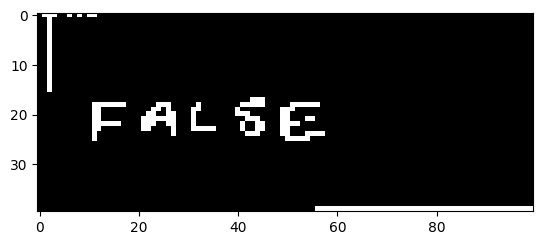

In [8]:
plt.imshow(images[9], cmap = 'Greys')

In [9]:
labels[9]

'False'

In [10]:
label_to_index = {'True': 0, 'False': 1, 'Empty': 2}
labels_encoded = np.array([label_to_index[label] for label in labels])

In [11]:
labels_encoded

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

In [13]:
X_train[0].shape

(40, 100)

In [14]:
len(y_train)

224

In [15]:
batch_size = 32
epochs = 30

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 40, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

C:\Users\deepa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
X_train = X_train.reshape(-1, img_height, img_width, 1)
X_val = X_val.reshape(-1, img_height, img_width, 1)

In [19]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=5)])

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4265 - loss: 1.0220 - val_accuracy: 0.5536 - val_loss: 0.8339
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5634 - loss: 0.8754 - val_accuracy: 0.5536 - val_loss: 0.7846
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5605 - loss: 0.8758 - val_accuracy: 0.5536 - val_loss: 0.8913
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5487 - loss: 0.9132 - val_accuracy: 0.5536 - val_loss: 0.8285
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4758 - loss: 0.8704 - val_accuracy: 0.5536 - val_loss: 0.7975
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5251 - loss: 0.8526 - val_accuracy: 0.5536 - val_loss: 0.7955
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5196 - loss: 0.8669 - val_accuracy: 0.5536 - val_loss: 0.7773
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5329 - loss: 0.8761 - val_accuracy: 0.5536 - val_loss: 0.8118


In [20]:
def plot_history(history):
    # Get training and validation accuracy and loss from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get the number of epochs
    epochs = range(1, len(acc) + 1)
    
    # Plot validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

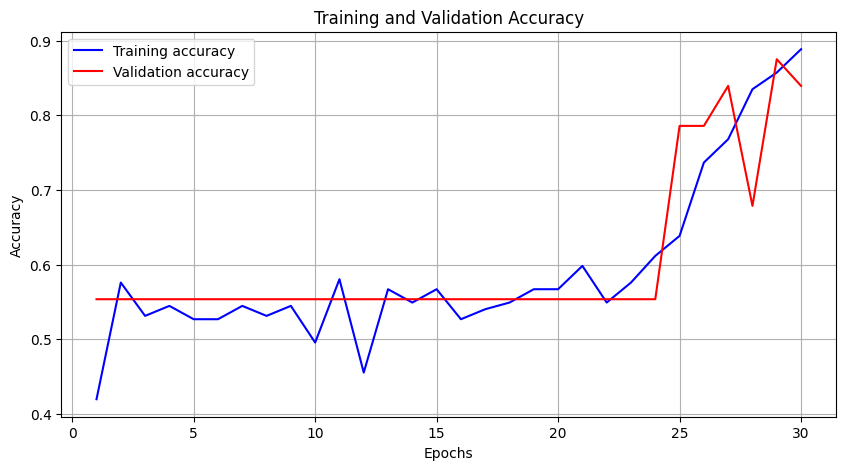

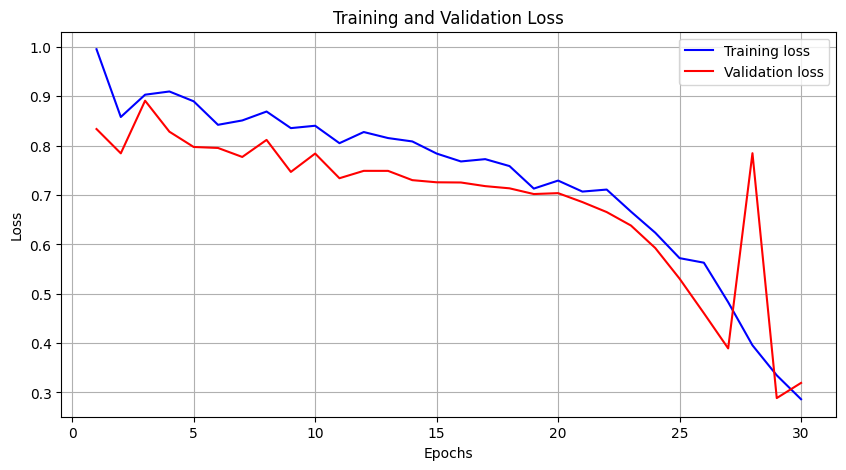

In [21]:
plot_history(history)

In [22]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)
print("Validation Loss:", loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8512 - loss: 0.2949
Validation Accuracy: 0.8392857313156128
Validation Loss: 0.3194289803504944


In [23]:
model.save('my_model.keras')